# 한국 영화 시놉시스를 활용한 워드 임베딩

__목표__
  - 시놉시스 텍스트 데이터 토큰화
  - 명사 추출
  - 임베딩 학습
  - 장르별 대표 명사 선정

In [27]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [10]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

# print(s(target_X['장미'], A, B))

In [11]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

# print(round(weat_score(X, Y, A, B), 3))

In [13]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [21]:
from konlpy.tag import Okt
from konlpy.tag import Mecab

okt = Okt()
mecab = Mecab()
# 사용가능한 품사 태거, 타겟 품사, 함수 인자 선언
morphs = [(okt, ["Noun"], {"stem":True, "norm":True}),
          (mecab, ["NNB","NNBC","NNG","NNP","NP","NR",], {}),
         ]

In [16]:
tagger = morphs[1]

tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        # 'tagger[2]'' 엔 다음과 같은 인자 포함 'stem=True', 'norm=True'
        words = tagger[0].pos(line, **tagger[2]) 
        res = []
        for w in words:
            if w[1] in tagger[1]:
                res.append(w[0])
        tokenized.append(res)

In [28]:
from gensim.models import Word2Vec

# 토큰화된 문장들의 리스트를 인자로 전달
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

[('작품', 0.8916786313056946),
 ('다큐멘터리', 0.8532419204711914),
 ('드라마', 0.8443583846092224),
 ('소재', 0.8235710859298706),
 ('옴니버스', 0.8233785629272461),
 ('형식', 0.8163297772407532),
 ('주제', 0.8140590190887451),
 ('코미디', 0.8080903887748718),
 ('감동', 0.7980815768241882),
 ('편', 0.7953895926475525)]

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

# 품사 태거 정보를 인자로 함께 전달
def read_token(file_name, tagger):
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = tagger[0].pos(line, **tagger[2]) 
            for word in tokenlist:
                if word[1] in tagger[1]:
                    result.append((word[0])) 
    return ' '.join(result)

In [23]:
art = read_token(art_txt, morphs[1])
gen = read_token(gen_txt, morphs[1])

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [39]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)
print(vectorizer.vocabulary_['영화'])
# Warning: 'get_feature_names'함수는 deprecated 예정
print(vectorizer.get_feature_names_out()[25414])

(2, 43482)
25414
영화


In [25]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 사랑, 사람, 친구, 영화, 남자, 여자, 가족, 이야기, 마을, 마음, 사건, 시간, 세상, 아버지, 아이, 엄마, 세계, 아들, 소녀, 아내, 사이, 영화제, 하나, 감독, 서로, 남편, 비밀, 여행, 인생, 학교, 우리, 발견, 순간, 사실, 음악, 생활, 아빠, 마지막, 기억, 행복, 모습, 죽음, 소년, 이상, 도시, 단편, 사고, 결혼, 한편, 때문, 위기, 생각, 관계, 성공, 전쟁, 일상, 경찰, 최고, 과거, 인간, 현실, 미국, 상황, 결심, 운명, 여인, 하루, 이름, 이후, 준비, 위험, 동안, 감정, 충격, 누구, 살인, 부모, 한국, 존재, 연인, 어머니, 희망, 특별, 결국, 청년, 국제, 그곳, 시절, 동생, 작가, 작품, 여성, 상처, 모두, 사회, 목숨, 할머니, 

일반영화를 대표하는 단어들:
자신, 영화제, 그녀, 사람, 시작, 영화, 친구, 국제, 남자, 사랑, 이야기, 여자, 서울, 사건, 남편, 가족, 아이, 아버지, 시간, 세계, 단편, 마을, 엄마, 마음, 아들, 모습, 관계, 감독, 생각, 작품, 사이, 세상, 발견, 아내, 여성, 소녀, 하나, 사실, 우리, 애니메이션, 때문, 이상, 인간, 생활, 죽음, 결혼, 비밀, 상황, 학교, 기억, 도시, 여행, 소년, 한편, 순간, 서로, 과거, 경찰, 동안, 미국, 마지막, 현실, 전쟁, 존재, 일상, 주인공, 사회, 사고, 그곳, 어머니, 연출, 인생, 섹스, 다큐멘터리, 부문, 한국, 살인, 위험, 행복, 최고, 의도, 위기, 동생, 조직, 부부, 회사, 계획, 이후, 일본, 시절, 성공, 아빠, 결국, 문제, 부산, 하루, 음악, 그것, 부모, 운명, 

In [29]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    # 여기 model은 word2vec 임베딩 모델
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [40]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']

genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name, morphs[1]))
    
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.
(21, 44765)


In [41]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 자신, 지구, 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


시작, 사람, 인류, 인간, 세계, 우주, 미래, 로봇, 그녀, 박사, 친구, 거대, 외계, 
가족: 엄마, 아빠, 영화제, 가족, 자신, 친구, 아버지, 시작, 그녀, 아들, 사랑, 마을, 국제, 아이, 낙타, 
공연: 사랑, 오페라, 비올레타, 실황, 스카르피, 토스카, 백작, 자신, 카바, 레오노라, 그녀, 공연, 알프레도, 오텔로, 리골레토, 
공포(호러): 친구, 시작, 사람, 자신, 그녀, 공포, 사건, 발견, 죽음, 남자, 이상, 마을, 영화, 여자, 가족, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 남자, 그녀, 여자, 친구, 사랑, 시작, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 다큐멘터리, 국제, 사람, 이야기, 감독, 자신, 서울, 우리, 세계, 여성, 시작, 그녀, 
드라마: 자신, 영화제, 그녀, 사랑, 영화, 사람, 시작, 남자, 친구, 국제, 여자, 이야기, 엄마, 단편, 가족, 
멜로로맨스: 그녀, 사랑, 남자, 자신, 친구, 여자, 시작, 남편, 사람, 섹스, 마음, 결혼, 아내, 관계, 부부, 
뮤지컬: 뮤지컬, 사랑, 지모도, 에스메랄다, 영화, 프롤, 그녀, 스카르피, 음악, 충무로, 모차르트, 카바, 자신, 영화제, 토스카, 
미스터리: 사건, 그녀, 시작, 자신, 사람, 친구, 사고, 발견, 진실, 죽음, 기억, 남자, 아내, 살인, 민혁, 
범죄: 사건, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 수사, 여자, 발견, 
사극: 조선, 시작, 사랑, 신기전, 자신, 춘향, 아가멤논, 그녀, 채선, 루안, 황제, 최고, 운명, 사람, 하선, 
서부극(웨스턴): 아이삭, 보안관, 챔벌린, 서부, 카우보이, 헨리, 마을, 자신, 개릿, 아르만도, 사냥, 레이프, 바인, 시작, 서부극, 
성인물(에로): 그녀, 남편, 성애, 자신, 관계, 남자, 섹스, 정사, 마사지, 영화, 여자, 시작, 친구, 유부녀, 마음, 
스릴러: 자신, 그녀, 사건, 시작, 사람, 

In [42]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]


In [43]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [44]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.23127578
SF 공연 -0.06495185
SF 공포(호러) -0.57152146
SF 기타 0.40033713
SF 다큐멘터리 0.61821353
SF 드라마 0.07289364
SF 멜로로맨스 -0.4354821
SF 뮤지컬 0.4647817
SF 미스터리 -0.68975484
SF 범죄 -0.005943743
SF 사극 -0.50929815
SF 서부극(웨스턴) -0.12077808
SF 성인물(에로) -0.26929498
SF 스릴러 -0.46375516
SF 애니메이션 0.7743912
SF 액션 -0.11661817
SF 어드벤처 -0.64923614
SF 전쟁 0.66249454
SF 코미디 -0.170755
SF 판타지 -0.05297421
가족 공연 0.24010104
가족 공포(호러) -0.5014175
가족 기타 0.76846427
가족 다큐멘터리 0.81146497
가족 드라마 0.46868047
가족 멜로로맨스 -0.4869806
가족 뮤지컬 0.80735326
가족 미스터리 -0.6376702
가족 범죄 0.1947621
가족 사극 -0.47137266
가족 서부극(웨스턴) 0.25288898
가족 성인물(에로) -0.23573948
가족 스릴러 -0.38168117
가족 애니메이션 1.0013064
가족 액션 0.13411023
가족 어드벤처 -0.4966925
가족 전쟁 0.653547
가족 코미디 0.1014214
가족 판타지 0.24667802
공연 공포(호러) -0.52463794
공연 기타 0.8587279
공연 다큐멘터리 0.8211484
공연 드라마 0.3308336
공연 멜로로맨스 -0.58408827
공연 뮤지컬 0.9677428
공연 미스터리 -0.63696826
공연 범죄 0.057801146
공연 사극 -0.6485239
공연 서부극(웨스턴) -0.011729967
공연 성인물(에로) -0.39397544
공연 스릴러 -0.44636732
공연 애니메이션 1.0278622
공연 액션 -0.0

In [45]:
from matplotlib import pyplot as plt

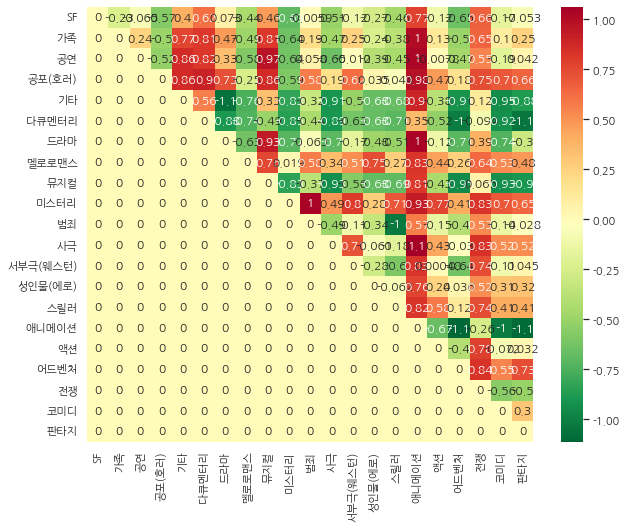

In [48]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, ax=ax1,
            xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
plt.show()